# Generative Adversarial Network (GAN)

In [1]:
# Adaptação para utilizar a sintaxe do TensorFlor 1.x no TensorFlow 2.x
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


<br/> 
## 1. Geração de Imagens

In [4]:
data = mnist.load_data()

x = np.asarray(data[0][0], dtype=np.float32) # 60k dados (28x28)
y = np.asarray(data[0][1], dtype=np.int32)

# Normalização
x = np.array(list(map(lambda value: value / 255., [item for item in x])))

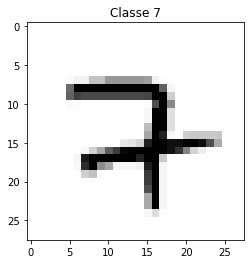

In [5]:
reg = 38
plt.imshow(x[reg], cmap='Greys')
plt.title('Classe {}'.format(y[reg]))
plt.show()

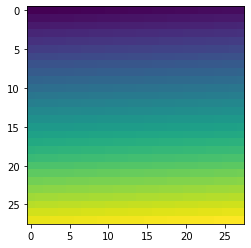

In [6]:
# Visualização de uma imagem aleatória
img_1 = np.arange(784).reshape(-1, 28)
plt.imshow(img_1)

In [7]:
x = x.reshape(x.shape[0], -1)

In [8]:
tf.reset_default_graph()

In [9]:
# Criação dos Placeholders
ruido_ph = tf.placeholder(tf.float32, shape=(None, 100))

img_reais_ph = tf.placeholder(tf.float32, shape=(None, 784))

In [10]:
# Criação dos processos de FeedForward das Redes Neurais
def gerador(ruido, reuse=tf.AUTO_REUSE):
    with tf.variable_scope('gerador', reuse=reuse):
        # Estrutura da RNA_Gerador (100 -> 128 -> 128 -> 784)
        hidden_layer1 = tf.nn.relu(tf.layers.dense(inputs=ruido, units=128))
        hidden_layer2 = tf.nn.relu(tf.layers.dense(inputs=hidden_layer1, units=128))
        output_layer = tf.layers.dense(inputs=hidden_layer2, units=784, activation=tf.nn.tanh)
        
        return output_layer
    
def discriminador(input_layer, reuse=tf.AUTO_REUSE):
    with tf.variable_scope('discriminador', reuse=reuse):
        # Estrutura da RNA_Discriminador (784 -> 128 -> 128 -> 1)
        hidden_layer1 = tf.nn.relu(tf.layers.dense(inputs=input_layer, units=128))
        hidden_layer2 = tf.nn.relu(tf.layers.dense(inputs=hidden_layer1, units=128))
        logits = tf.layers.dense(inputs=hidden_layer2, units=1, activation=tf.nn.sigmoid)
         # logits é a camada de saida sem a aplicação da funcao de ativacao
            
        return logits

In [11]:
# Calculo do Erro

logits_img_reais = discriminador(img_reais_ph)
logits_img_ruido = discriminador(gerador(ruido_ph), reuse=True)
 # reuse força a RNA reutilizar os pesos já criados,
 # reuse=False, faz com que a RNA crie uma segunda rede com novos pesos

# Erro do Discriminador
erro_discr_imgReais = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_img_reais,
                                                                             labels=tf.ones_like(logits_img_reais)*0.9))
erro_discr_imgRuido = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_img_ruido,
                                                                             labels=tf.zeros_like(logits_img_ruido)))
erro_discr = erro_discr_imgReais + erro_discr_imgRuido

# Erro do Gerador
erro_gerador = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_img_ruido,
                                                                      labels=tf.ones_like(logits_img_ruido)))

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [12]:
# Variaveis que são passíveis de treinamento
train_variables = tf.trainable_variables()
train_variables

[<tf.Variable 'discriminador/dense/kernel:0' shape=(784, 128) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense_1/kernel:0' shape=(128, 128) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense_2/kernel:0' shape=(128, 1) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense_2/bias:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'gerador/dense/kernel:0' shape=(100, 128) dtype=float32_ref>,
 <tf.Variable 'gerador/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_1/kernel:0' shape=(128, 128) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_2/kernel:0' shape=(128, 784) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_2/bias:0' shape=(784,) dtype=float32_ref>]

In [15]:
var_discriminador = [var for var in train_variables if 'discriminador' in var.name]
var_gerador = [var for var in train_variables if 'gerador' in var.name]

# O treinamento fará a otimização somente das variáveis da respectiva rede neural
train_discriminador = tf.train.AdamOptimizer(learning_rate=0.001).minimize(erro_discr, var_list=var_discriminador)

train_gerador = tf.train.AdamOptimizer(learning_rate=0.001).minimize(erro_gerador, var_list=var_gerador)

In [16]:
BATCH_SIZE = 100
EPOCHS = 100

In [18]:
amostras_test = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # Gerador gera imagens
    #ruido_test = np.random.uniform(-1, 1, size=(1,100))
    #amostra = sess.run(gerador(ruido_ph, reuse=True), feed_dict={ruido_ph: ruido_test})
    
    # Discriminador classifica imagens
    #n_batches = x.shape[0] // BATCH_SIZE
    #x_inBatches = np.array_split(x, n_batches)
    # Transforma os valores para escala [-1, 1] por conta da função de ativação tanh
    #x_inBatches = [x*2 - 1 for x in x_inBatches]
    
    #logits = sess.run(discriminador(img_reais_ph, reuse=True), feed_dict={img_reais_ph: x_inBatches[0]})
    #previsoes = sess.run(tf.nn.sigmoid(logits))
    
    for epoch in range(EPOCHS):
        n_batches = x.shape[0] // BATCH_SIZE
        x_inBatches = np.array_split(x, n_batches)
        
        for batch in range(n_batches):
            img_batch = x_inBatches[0] * 2 - 1
            ruido_batch = np.random.uniform(-1, 1, size=(BATCH_SIZE, 100))
            
            _, loss_d = sess.run([train_discriminador, erro_discr], 
                                 feed_dict={img_reais_ph: img_batch, ruido_ph: ruido_batch})
            _, loss_g = sess.run([train_gerador, erro_gerador], feed_dict={ruido_ph: ruido_batch})
        
        if epoch % 5 == 0 or epoch == EPOCHS-1:
            print('\nEpoch {}:'.format(epoch+1))
            print('  erro Discr: {}'.format(loss_d))
            print('  erro Gerad: {}'.format(loss_g))
            
        ruido_test = np.random.uniform(-1, 1, size=(1, 100))
        img_gerada = sess.run(gerador(ruido_ph, reuse=True), feed_dict={ruido_ph: ruido_test})
        
        amostras_test.append(img_gerada)


Epoch 1:
  erro Discr: 1.1064127683639526
  erro Gerad: 0.6931433081626892

Epoch 2:
  erro Discr: 1.1064114570617676
  erro Gerad: 0.6931446194648743

Epoch 3:
  erro Discr: 1.1064140796661377
  erro Gerad: 0.693142294883728

Epoch 4:
  erro Discr: 1.3862943649291992
  erro Gerad: 0.6931471824645996

Epoch 5:
  erro Discr: 1.3862943649291992
  erro Gerad: 0.6931471824645996

Epoch 6:
  erro Discr: 1.3862943649291992
  erro Gerad: 0.6931471824645996

Epoch 7:
  erro Discr: 1.3862943649291992
  erro Gerad: 0.6931471824645996

Epoch 8:
  erro Discr: 1.3862943649291992
  erro Gerad: 0.6931471824645996

Epoch 9:
  erro Discr: 1.3862943649291992
  erro Gerad: 0.6931471824645996

Epoch 10:
  erro Discr: 1.3862943649291992
  erro Gerad: 0.6931471824645996

Epoch 11:
  erro Discr: 1.3862943649291992
  erro Gerad: 0.6931471824645996

Epoch 12:
  erro Discr: 1.3862943649291992
  erro Gerad: 0.6931471824645996

Epoch 13:
  erro Discr: 1.3862943649291992
  erro Gerad: 0.6931471824645996

Epoch 14

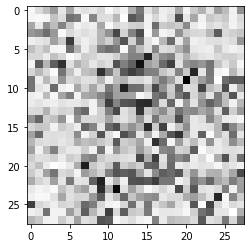

In [32]:
plt.imshow(amostras_test[99].reshape(28, 28), cmap='Greys')